# Face recognition using Principal Component Analysis(PCA) and K-nearest Neighbors Algorithm (KNN)

# Principal Component Analysis(PCA)

Principal component analysis (PCA) simplifies the complexity in high-dimensional data while retaining trends and patterns. It does this by transforming the data into fewer dimensions, which act as summaries of features. High-dimensional data are very common in biology and arise when multiple features, such as expression of many genes, are measured for each sample. This type of data presents several challenges that PCA mitigates: computational expense and an increased error rate due to multiple test correction when testing each feature for association with an outcome. PCA is an unsupervised learning method and is similar to clustering—it finds patterns without reference to prior knowledge about whether the samples come from different treatment groups or have phenotypic differences.

# K-nearest Neighbors Algorithm (KNN)

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). KNN has been used in statistical estimation and pattern recognition already in the beginning of 1970’s as a non-parametric technique.

# Eigenface


Eigenfaces is the name given to a set of eigenvectors when they are used in the computer vision problem of human face recognition. The approach of using eigenfaces for recognition was developed by Sirovich and Kirby (1987) and used by Matthew Turk and Alex Pentland in face classification. The eigenvectors are derived from the covariance matrix of the probability distribution over the high-dimensional vector space of face images. The eigenfaces themselves form a basis set of all images used to construct the covariance matrix. This produces dimension reduction by allowing the smaller set of basis images to represent the original training images. Classification can be achieved by comparing how faces are represented by the basis set. 

# Steps 

# Face Database


For this project  , the  Yale Face Database has been used . From the database, 50 grayscale images  of 5 individuals have been taken where 9 images are training set and 1 image for testing per individuals . Each image is 243 pixels in height and 320 pixels in width .  

In [1]:
#Importing required python libraries for the project
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import glob
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


1st of all , we will import all images for triaining set matrix 

In [2]:
image_list= [] # faces of training set 

for filename in glob.glob('/home/mahfuz/Desktop/BIG_DATA/project/train/subject01/*'):
    im=mpimg.imread(filename) # 9 training images of subject 1 
    image_list.append(im)
for filename in glob.glob('/home/mahfuz/Desktop/BIG_DATA/project/train/subject02/*'):
    im=mpimg.imread(filename)  # 9 training images of subject 2 
    image_list.append(im)  
for filename in glob.glob('/home/mahfuz/Desktop/BIG_DATA/project/train/subject03/*'):
    im=mpimg.imread(filename)    # 9 training images of subject 3
    image_list.append(im)
for filename in glob.glob('/home/mahfuz/Desktop/BIG_DATA/project/train/subject04/*'):
    im=mpimg.imread(filename)    # 9 training images of subject 4
    image_list.append(im)

for filename in glob.glob('/home/mahfuz/Desktop/BIG_DATA/project/train/subject05/*'):
    im=mpimg.imread(filename)   # 9 training images of subject 5 
    image_list.append(im) 

    
   
image_list_matrix = np.array(image_list)
n,h,w = image_list_matrix.shape
print('number of training images %s , height of images %s , width of images %s'%(n,h,w)) 



number of training images 45 , height of images 243 , width of images 320


In [3]:
#each image in training matrix is in 2D shape (243*320) 
image_list_training= image_list_matrix.flatten().reshape(45,77760) # converting 2D matrix to 1D matrix 
image_list_training.shape # each column represent one images of (243*320) or 77760 number of fitures/pixels


(45, 77760)

In [4]:

image_list_training


array([[  0.50980395,   0.50980395,   0.50980395, ...,   0.26666668,
          0.26666668,   0.26666668],
       [  0.50980395,   0.50980395,   0.50980395, ...,   0.26666668,
          0.26666668,   0.26666668],
       [  0.14509805,   0.14901961,   0.14117648, ...,   0.26666668,
          0.26666668,   0.26666668],
       ...,
       [119.        , 129.        , 130.        , ...,  68.        ,
         68.        ,  68.        ],
       [130.        , 130.        , 130.        , ...,  68.        ,
         68.        ,  68.        ],
       [117.        , 129.        , 130.        , ...,  68.        ,
         68.        ,  68.        ]], dtype=float32)

In [5]:

number_of_train_pic = len(image_list)
number_of_train_pic #9 pic per subject


45

In [6]:

target= [ 1,  1,  1,  1,  1,  1,  1, 1, 1, 
         2,  2,  2,  2,  2,  2,  2,  2,  2,   
         3,  3,  3,  3, 3,  3,  3,  3,  3,  
         4,  4,  4,  4,  4,  4,  4,  4,  4,   
         5,  5,  5,  5,  5,  5,  5,  5,  5,]

len(target)


45

In [7]:
number_of_classes = max(target)
number_of_classes


5

Faces of each subjects for training set


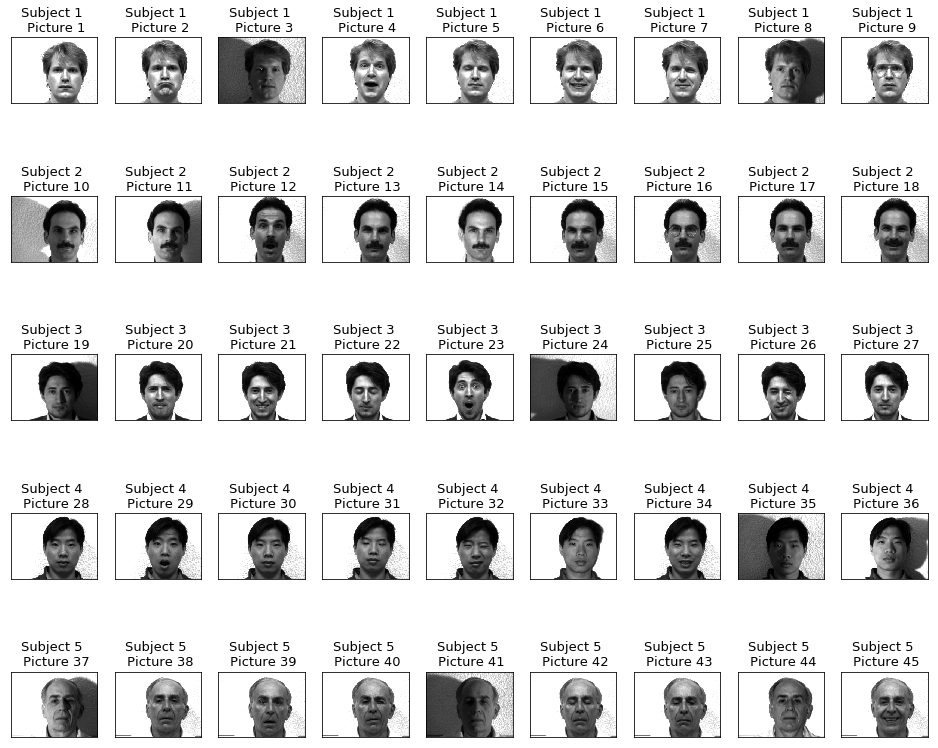

In [8]:
print("Faces of each subjects for training set")
plt.figure(figsize=(13,11.6))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(45):
        plt.subplot(5, 9, i + 1)
        plt.imshow(image_list[i].reshape((243, 320)), cmap=plt.cm.gray)
        
        plt.title("Subject %s \n Picture %s" % (target[i],i+1), size=13)
        plt.xticks(( ))
        plt.yticks(())
        

Now ,ploting the mean image of training set matrix

Mean image of training set : 


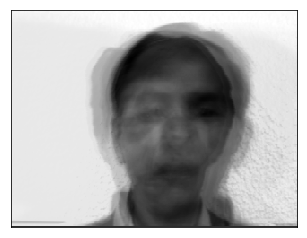

In [9]:
print("Mean image of training set : ")
mean_image = np.mean(image_list,axis=0)
plt.figure
plt.imshow(mean_image.reshape((243, 320)), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()


Using PCA, reduciton of 45 number of components to 15 number of principal components  and finding the eigen faces.
We will  find the eigen vectors corresponding to the biggest eigen values of the covariance matrix of the data. These eigen vectors are the directions along which the data shows maximum amount of variation. Each eigen vector can be considered as an eigen face. We can represent any image in the dataset as a linear combination of these eigen faces with minimum error.

In [13]:
#Reduce the dimensionality of the feature space
number_of_principal_components = 15

#Finding the top n_components principal components in the data
pca = PCA(  number_of_principal_components , whiten=True).fit(image_list_training)

#Find the eigen-vectors of the feature space
eigenfaces = pca.components_.reshape((number_of_principal_components, 243, 320))
eigenfaces.shape


(15, 243, 320)

Plotting the 15 eigen faces :


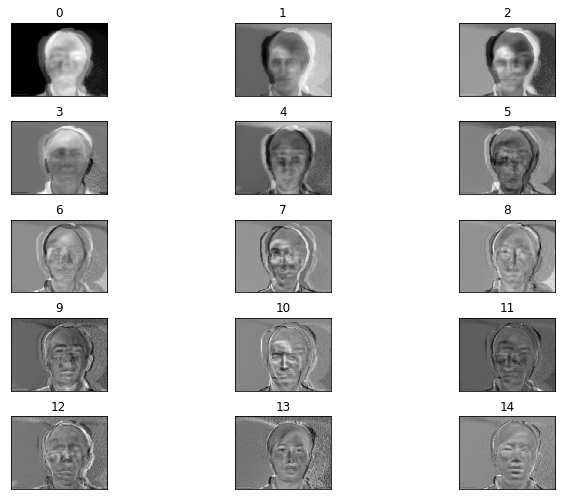

In [14]:
print("Plotting the 15 eigen faces :")
plt.figure(figsize=(1.8 * 5, 2.4 * 3))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(5* 3):
        plt.subplot(5, 3, i + 1)
        plt.imshow(eigenfaces[i].reshape((243, 320)), cmap=plt.cm.gray)
      
        plt.title(i, size=12)
        plt.xticks(())
        plt.yticks(())
        
        

Now , we will import 5 test images for face recongnition .

In [15]:
test =[]  # test images
for filename in glob.glob('/home/mahfuz/Desktop/BIG_DATA/project/test/*'):
    imm=mpimg.imread(filename)
    test.append(imm)    
test_imgaes = np.array(test)
test_images= test_imgaes.flatten().reshape(5,77760)
test_images.shape



(5, 77760)

Plotting the 5 test images :


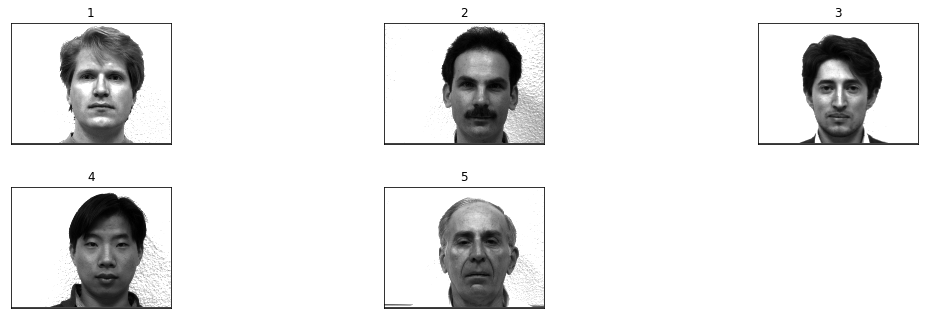

In [16]:
print("Plotting the 5 test images :")
plt.figure(figsize=(3 * 5, 4 * 3))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(5):
        plt.subplot(5, 3, i + 1)
        plt.imshow(test_images[i].reshape((243, 320)), cmap=plt.cm.gray)
      
        plt.title(i+1, size=12)
        plt.xticks(())
        plt.yticks(())
        
        

In [17]:

#Projecting the data onto the eigenspace
X__train_pca = pca.transform(image_list_training)
X__test_pca = pca.transform(test_images)


print("Current shape of input data matrix: ", X__test_pca.shape)



Current shape of input data matrix:  (5, 15)


Using  KNN-Classifier in this transformed space to identify the faces:
    The K-nearest neighbor is a non-parametric learning algorithm and does not learn an parameterized function that maps the input to the output. Rather it looks up the training set every time it is asked to classify a point and finds out the K nearest neighbors of the query point. The class corresponding to majority of the points is output as the class of the query point.




In [18]:
y__train=[ 1,  1,  1,  1,  1,  1,  1, 1, 1, 
         2,  2,  2,  2,  2,  2,  2,  2,  2,   
         3,  3,  3,  3, 3,  3,  3,  3,  3,  
         4,  4,  4,  4,  4,  4,  4,  4,  4,   
         5,  5,  5,  5,  5,  5,  5,  5,  5,]



In [19]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(X__train_pca, y__train)

#Detect faces in the test set
y__pred_test = knn_classifier.predict(X__test_pca)
y__test=[1,2,3,4,5,] # for accuracy test 
correct_count = 0.0
for i in range(len(y__test)):
    if y__pred_test[i] == y__test[i]:
        correct_count += 1.0
accuracy_of_prediction = correct_count/float(len(y__test))
print("Accuracy of prediction :", accuracy_of_prediction)
print(classification_report(y__test, y__pred_test))
print(confusion_matrix(y__test, y__pred_test, labels=range(number_of_classes)))



Accuracy of prediction : 0.8
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         1

   micro avg       0.80      0.80      0.80         5
   macro avg       0.70      0.80      0.73         5
weighted avg       0.70      0.80      0.73         5

[[0 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]]


/home/mahfuz/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Now , we will plot the predicted (using KNN) and true faces of the image data set . 

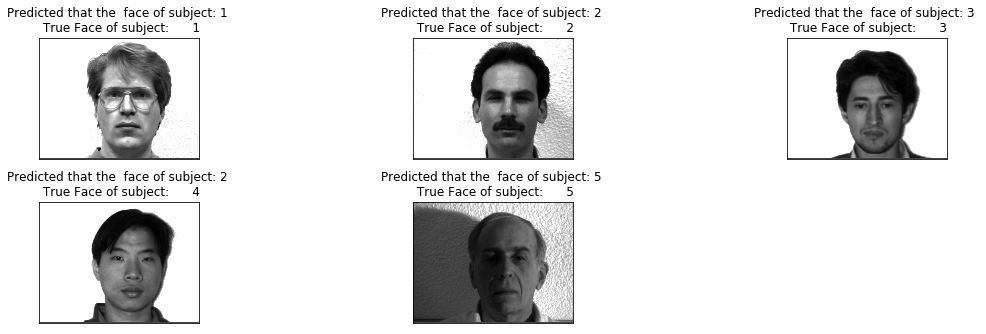

In [21]:
plt.figure(figsize=(3 * 5, 4 * 3))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(5):
    plt.subplot(5, 3, i + 1)
    plt.imshow(image_list[y__test[i]*8].reshape((243, 320)), cmap=plt.cm.gray)
      
    plt.title('Predicted that the  face of subject: %s \n True Face of subject:%s' % (y__pred_test[i], y__test[i]), size=12)
    plt.xticks(())
    plt.yticks(())
    
    
    